In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

In [4]:
## read the dataset
df = pd.read_csv("Dataset/height-weight .csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

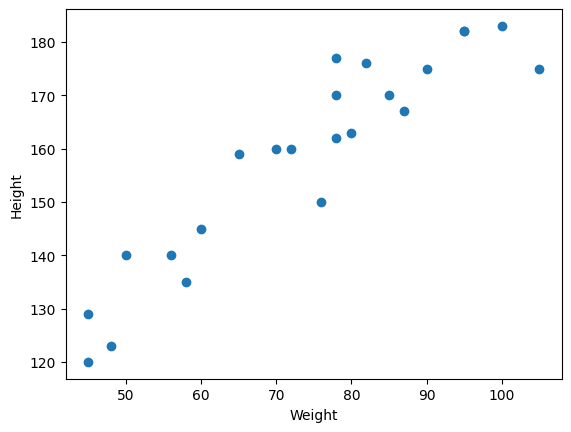

In [5]:
#scatterplot for dependent and independent variable
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

1.Divide the dataset into dependent and independent variables
2. do the Train test split
3. Standadizing the independent variables
3. Train the model using linear regression


In [16]:
#divide dataset into dependent and independent variables
X = df[['Weight']] # independent variable
y = df['Height'] # dependent variable


In [17]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train 

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
regressor.coef_, regressor.intercept_

(array([17.03440872]), np.float64(157.5))

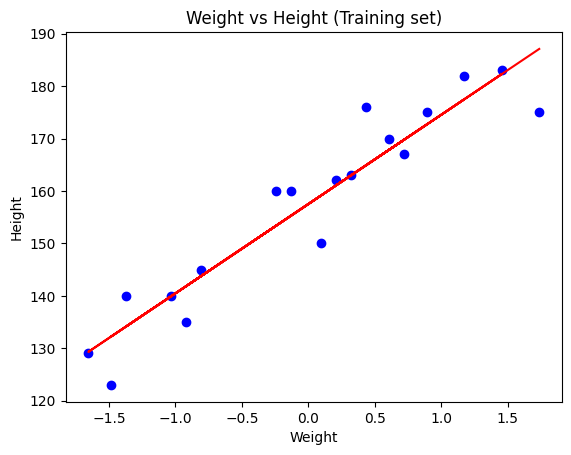

In [24]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Weight vs Height (Training set)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [27]:
print (f"Mean Squared Error: {mse}")
print (f"R^2 Score: {r2}")
print (f"Mean Absolute Error: {mae}")
print (f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 109.77592599051664
R^2 Score: 0.776986986042344
Mean Absolute Error: 9.822657814519232
Root Mean Squared Error: 10.477400726827081


In [28]:
#adjusted r2 score
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2 Score: {adjusted_r2}")

Adjusted R^2 Score: 0.7026493147231252


In [29]:
#for new data point
new_data =80
scaled_new_data= scaler.transform([[new_data]])
print(f"new scaled data: {scaled_new_data}")

new scaled data: [[0.32350772]]


/Users/bharadwajmurthy/Library/Caches/pypoetry/virtualenvs/linear_regression-1cLguvrK-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
regressor.predict(scaled_new_data)

array([163.01076266])

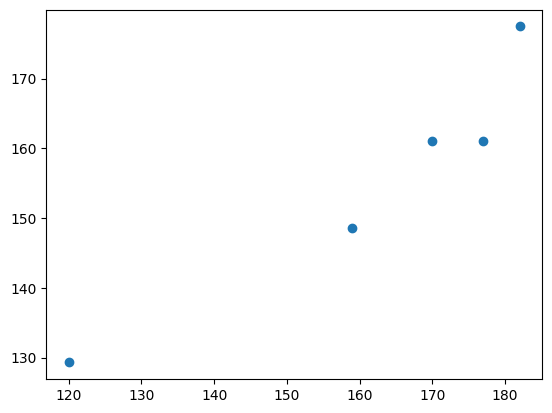

In [44]:
#Linear graph
residuals = y_test- y_pred
plt.scatter(y_test, y_pred)

In [37]:
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

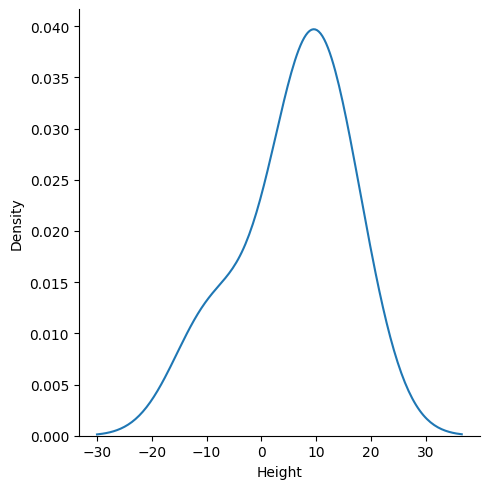

In [ ]:
## normal distribution
import seaborn as sns
sns.displot(residuals, kind="kde")

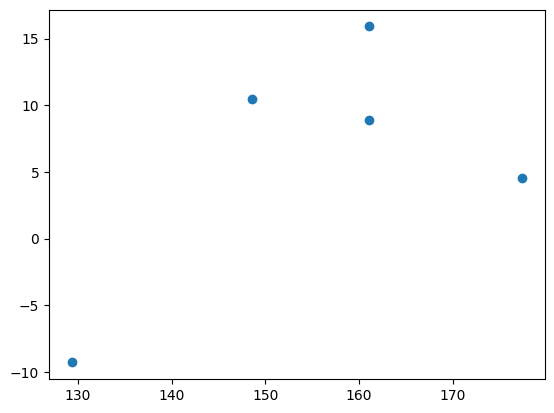

In [45]:
#Uniform distribution of residuals
plt.scatter(y_pred, residuals)